In [185]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
data = pd.read_csv("E:\\Imarticus-DSP\\Data sets\\Toyota Corolla\\ToyotaCorolla.csv")

In [187]:
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


(array([ 110.,  706.,  343.,  114.,   75.,   59.,   22.,    4.,    0.,    3.]),
 array([  4350.,   7165.,   9980.,  12795.,  15610.,  18425.,  21240.,
         24055.,  26870.,  29685.,  32500.]),
 <a list of 10 Patch objects>)

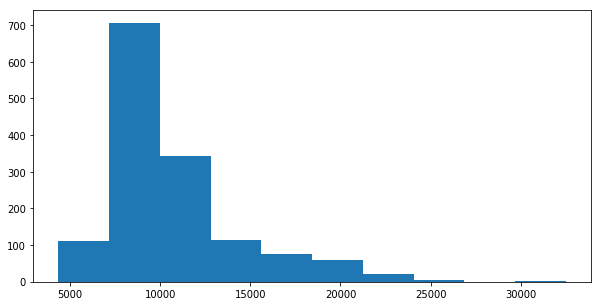

In [189]:
plt.figure(figsize=(10,5))
plt.hist(np.sort(data['Price']))

In [190]:
import seaborn as sns

In [191]:
#Following columns are quantitative
# Price        1436 non-null int64
#Age          1436 non-null int64
#KM           1436 non-null int64
#HP           1436 non-null int64
#CC           1436 non-null int64
#Doors        1436 non-null int64
#Weight       1436 non-null int64

In [192]:
#Convert the categorical variables to dummy variables
#FuelType     1436 non-null object

In [193]:
dummy_fuel = pd.get_dummies(data['FuelType'], drop_first='True')

In [194]:
print(dummy_fuel)

      Diesel  Petrol
0          1       0
1          1       0
2          1       0
3          1       0
4          1       0
5          1       0
6          1       0
7          1       0
8          0       1
9          1       0
10         0       1
11         0       1
12         0       1
13         0       1
14         0       1
15         0       1
16         0       1
17         0       1
18         0       1
19         0       1
20         0       1
21         0       1
22         0       1
23         0       1
24         0       1
25         0       1
26         0       1
27         0       1
28         0       1
29         0       1
...      ...     ...
1406       0       1
1407       0       1
1408       0       1
1409       0       1
1410       0       1
1411       0       1
1412       0       1
1413       0       1
1414       0       1
1415       0       1
1416       0       1
1417       0       1
1418       0       1
1419       0       1
1420       0       1
1421       0 

In [195]:
type(dummy_fuel)

pandas.core.frame.DataFrame

In [196]:
from collections import Counter
Counter(data['FuelType'])

Counter({'CNG': 17, 'Diesel': 155, 'Petrol': 1264})

In [197]:
data_new = pd.concat([data, dummy_fuel], axis=1)

In [198]:
data_new.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [199]:
data=data_new.drop('FuelType', axis=1)

In [200]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

# Data Exploratory Analysis

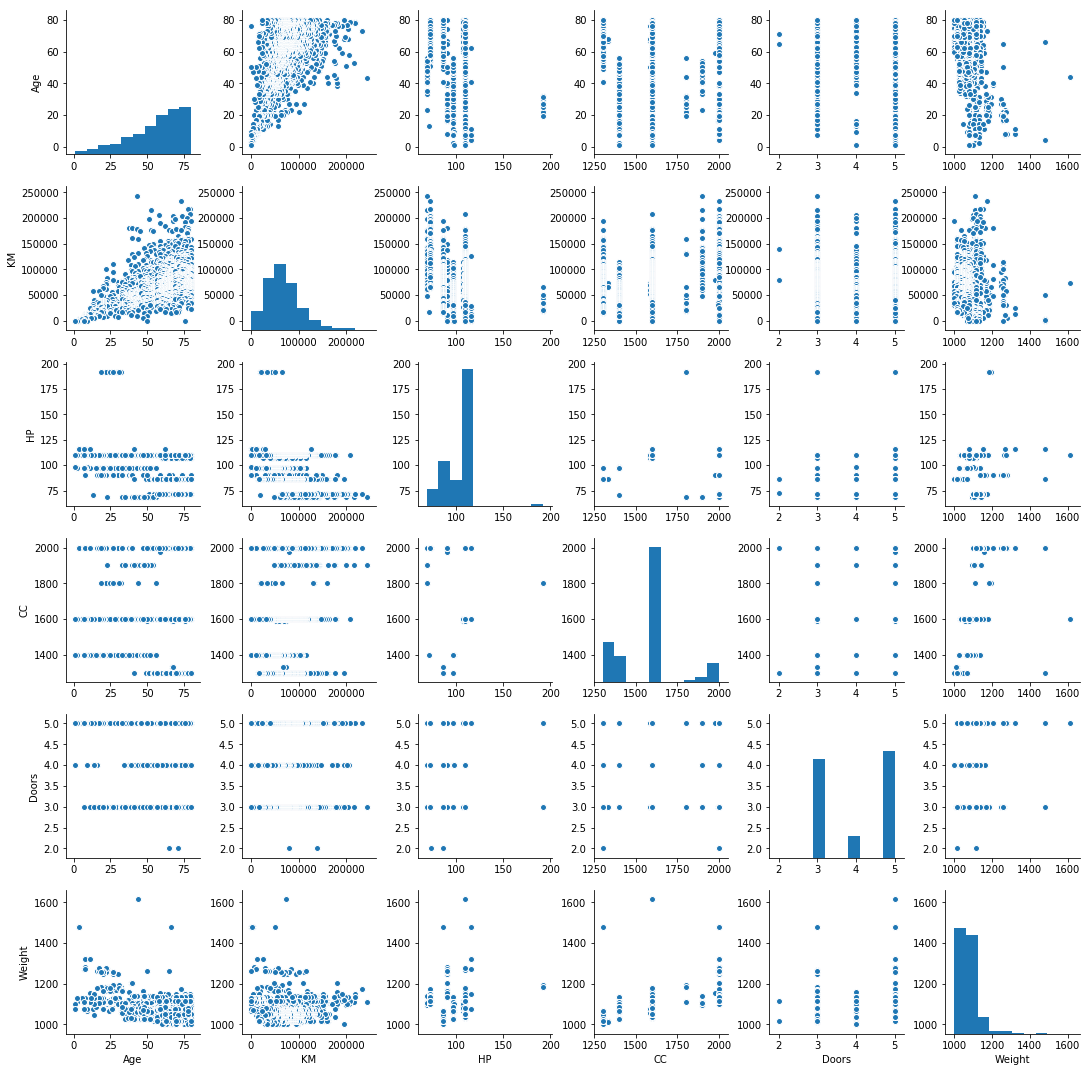

In [201]:
sns.pairplot(data[['Age','KM','HP','CC','Doors','Weight']])

## check for outliers using box plot

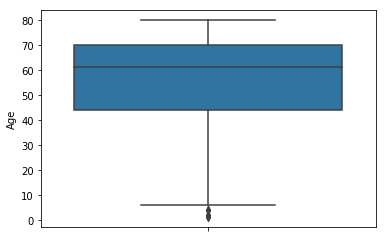

In [202]:
#sns.pairplot(data[['Age','KM','HP','CC','Doors','Weight']])
sns.boxplot('Age', data=data, orient='v')

In [203]:
data['Age'].describe()

count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

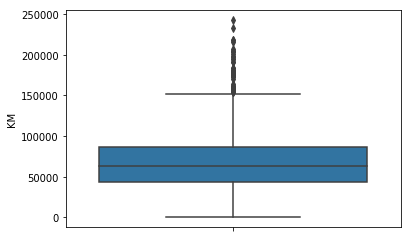

In [204]:
sns.boxplot(x='KM', data=data, orient='v')

In [205]:
data['KM'].describe()

count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: KM, dtype: float64

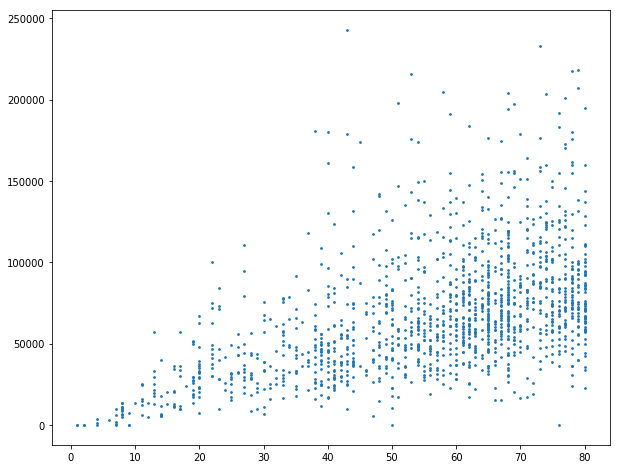

In [206]:
#check scatterplot of Age and KM to see if as age increases number of kms increases
plt.figure(figsize=(10,8))
plt.scatter(x=data['Age'], y=data['KM'], s=3)
#the scatter plot shows that as the age of the vehicle increases, so does the distance. With an exception of a 
#few vehicles. Whih are acceptable outliers

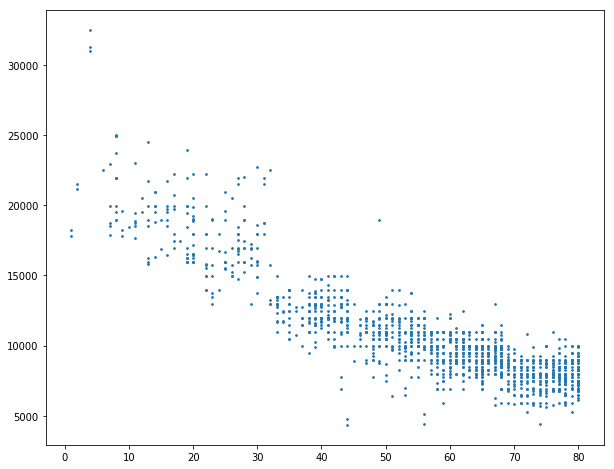

In [207]:
#check the scatterplot of age and price
plt.figure(figsize=(10,8))
plt.scatter(x=data['Age'], y=data['Price'], s=3)
#so.. older the vehicle, lesser the price 

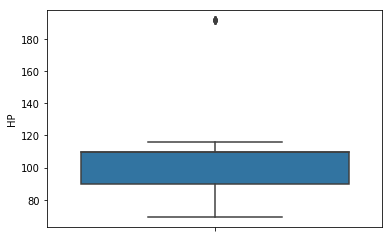

In [208]:
#check for outliers of the rest of the quantitative variables
sns.boxplot(x='HP', data=data, orient='v')

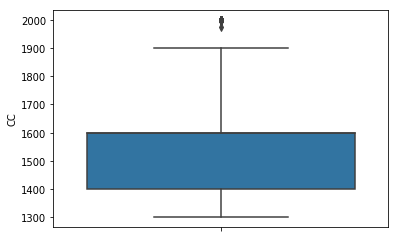

In [209]:
sns.boxplot(x='CC', data=data, orient='v')

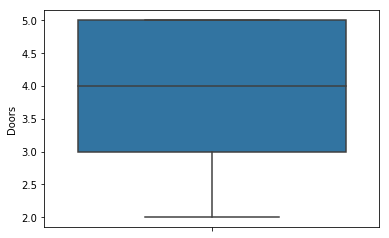

In [210]:
sns.boxplot(x='Doors', data=data, orient='v')

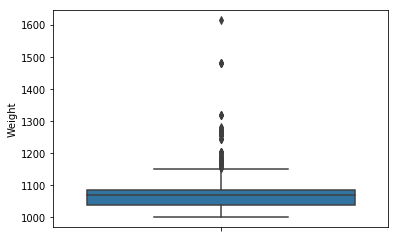

In [211]:
sns.boxplot(x='Weight', data=data, orient='v')

In [212]:
data['Weight'].describe()

count    1436.00000
mean     1072.45961
std        52.64112
min      1000.00000
25%      1040.00000
50%      1070.00000
75%      1085.00000
max      1615.00000
Name: Weight, dtype: float64

In [213]:
data['Price'].describe()

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

# Modelling

In [214]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [215]:
#Split the x and y variables 
y = data['Price']
x = data.iloc[:,1:]

In [216]:
x.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

In [217]:
y.column='Price'

In [218]:
y.head(5)

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [219]:
#Split the data to train and test data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=365)

In [220]:
x_train.head(5)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
796,60,74337,86,0,0,1300,5,1035,0,1
352,38,26262,110,1,0,1600,5,1075,0,1
768,59,78750,90,1,0,1975,5,1155,1,0
772,61,78063,107,1,1,1600,5,1100,0,1
68,22,30000,110,1,0,2000,5,1275,1,0


In [221]:
x_test.head(5)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Diesel,Petrol
42,22,46961,97,0,0,1400,3,1100,0,1
1012,66,36658,110,0,0,1600,3,1050,0,1
547,55,44537,97,0,0,1400,3,1025,0,1
366,35,21904,97,0,0,1400,3,1025,0,1
1354,79,60142,110,0,0,1600,3,1050,0,1


In [222]:
print(len(x_test))

359


In [223]:
y_train.head(5)

796    11950
352    12450
768    10950
772     9500
68     22250
Name: Price, dtype: int64

In [224]:
y_test.head(5)

42      13950
1012     9950
547      9950
366     10950
1354     9450
Name: Price, dtype: int64

In [225]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [226]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [227]:
lr_predict = lr.predict(x_test)

In [228]:
print(lr_predict)

[ 15922.40047874   9694.19162534  10529.31638088  13366.55717546
   7703.53991069  11293.05357065  14854.51858167   7926.32786907
  10219.87726585  11056.53699706  12826.29391104  10263.59124494
  16926.10863352  17990.29446136  10027.15961851  10994.97510922
   7623.42359281  10111.31483935   8852.27784972   7403.13940629
   9691.29343977   8109.53668204   8057.89009285  12316.45277246
   7832.9775925   16397.7962566   11603.74800593  10160.63322655
  15684.94293847   9932.52924735  10785.8989783    8051.01772333
   8270.6181485   15978.43237782  11184.54301916   7904.11181537
  20771.60239757   9428.46077266   8777.05986558   9797.15157636
   5933.48892474  12684.25125591  15709.87248469  11198.45420135
   9371.7545852    5012.88646431   9493.74358235   8634.60701794
  20063.33129622   8929.16031644   9763.47346781  17479.08334116
  10009.4177025    9068.92266969   6689.83284127   9985.22093373
  16633.27109142  15920.09574553   7288.1748989   15743.58889247
  18901.41265624  16824.0

In [229]:
print(len(lr_predict))

359


In [230]:
#To evaluate model performance, calculate R2 value, RMSE, and explained variance score
#R2value - Greater the better
# RMSE - Need to find out
# Explained variance score - 1.0 is perfect. Lower value, worse is the model
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [231]:
r2_score(lr_predict, y_test)

0.86920691164329811

In [232]:
mean_squared_error(lr_predict, y_test)

1541950.700921512

In [233]:
explained_variance_score(lr_predict, y_test)

0.87023866285184681

In [234]:
print(lr.intercept_)
print(lr.coef_)

-1745.56944777
[ -1.22970759e+02  -1.66935724e-02   6.37882269e+01   4.93867878e+01
   3.83917462e+02  -4.50863389e+00   1.49149478e+01   1.83401905e+01
   3.68619751e+03   1.06294856e+03]


In [235]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [236]:
names=[]
for i in data.columns:
   names.append(i) 
print (names)

['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight', 'Diesel', 'Petrol']


In [237]:
names.remove('Price')

In [238]:
pd.DataFrame(list(zip(names, lr.coef_)), columns = ['Names', 'Co-efficients'])

,Names,Co-efficients
0,Age,-122.970759
1,KM,-0.016694
2,HP,63.788227
3,MetColor,49.386788
4,Automatic,383.917462
5,CC,-4.508634
6,Doors,14.914948
7,Weight,18.340190
8,Diesel,3686.197512
9,Petrol,1062.948563


## Calculation of variable significance

In [239]:
import statsmodels.api as sm

In [240]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [241]:
model1 = sm.OLS(y_train, x_train)

In [242]:
result = model1.fit()

In [243]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7540.
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:51:41   Log-Likelihood:                -9279.9
No. Observations:                1077   AIC:                         1.858e+04
Df Residuals:                    1067   BIC:                         1.863e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -124.2012      2.909    -42.697      0.0

In [244]:
#by hypothesis testing, the following fields are significant
#Age, KM, HP, Automatic, CC, Weight, Diesel, Petrol
#model using the following fields
x.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'Diesel', 'Petrol'],
      dtype='object')

In [245]:
x_new=x.drop('MetColor', axis=1)

In [246]:
x_new.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'Diesel',
       'Petrol'],
      dtype='object')

In [247]:
x_new_train, x_new_test, y_train_new, y_test_new = train_test_split(x_new, y, test_size = 0.25)

In [248]:
x_new.shape

(1436, 9)

In [249]:
x_new_train.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'Diesel',
       'Petrol'],
      dtype='object')

In [250]:
lr_new = LinearRegression()

In [251]:
lr_new.fit(x_new_train,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
lr_predict_new = lr_new.predict(x_new_test)

In [253]:
print(lr_new.intercept_)
print(lr_new.coef_)

131.08883038
[ -1.27209152e+02  -1.61046539e-02   5.60590111e+01   4.98503429e+02
  -3.11050033e+00   1.98429737e+01   1.54260958e+01   3.11494246e+03
   1.12482319e+03]


In [254]:
names_new = []
for j in x_new.columns:
    names_new.append(j)
print(names_new)

['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'Diesel', 'Petrol']


In [255]:
pd.DataFrame(list(zip(names_new, lr_new.coef_)), columns=['Names', 'New Co-efficients'])

,Names,New Co-efficients
0,Age,-127.209152
1,KM,-0.016105
2,HP,56.059011
3,Automatic,498.503429
4,CC,-3.110500
5,Doors,19.842974
6,Weight,15.426096
7,Diesel,3114.942455
8,Petrol,1124.823192


In [256]:
#check model performance by computing R2 value and explained_variance_score
print(r2_score(lr_predict_new, y_test_new))
print(explained_variance_score(lr_predict_new, y_test_new))

0.866470843548
0.86738573681
